In [7]:
import pickle
import os
import numpy as np

In [34]:
model_paths = {
    'mae':'/rds/project/kw350/rds-kw350-meld/experiments_graph/kw350/23-01-13_UPEU_dcd_mae_fold/s_2',
    'mle':'/rds/project/kw350/rds-kw350-meld/experiments_graph/kw350/23-01-13_UPEU_dcd_mle_fold/s_2',
    'maew':'/rds/project/kw350/rds-kw350-meld/experiments_graph/kw350/23-01-13_UPEU_dcd_maew_fold/s_2',
   # 'mae_seg_loss':'/rds/project/kw350/rds-kw350-meld/experiments_graph/kw350/23-01-17_SJWC_additional_mae_loss/s_2/'
}

In [35]:
aucs = []
labels= [] 
for model in model_paths.keys():
    
    for fold in np.arange(10):
        fname = os.path.join(model_paths[model],f'fold_0{fold}','results','roc_auc.pickle')
        with open(fname, 'rb') as handle:
            b = pickle.load(handle)
        aucs.append(b['auc_plus'])
        labels.append(model)



In [38]:
import ptitprince as pt
import pandas as pd
import scipy.stats as st

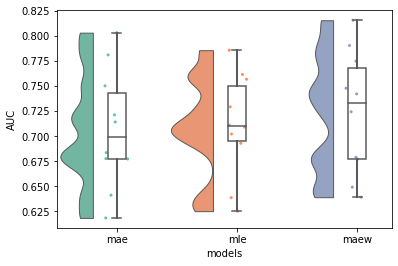

In [41]:
df = pd.DataFrame(np.vstack([aucs,labels]).T,columns=['AUC','models'],)
df['AUC'] = df['AUC'].astype(float)
pt.RainCloud(data=df, x='models',y='AUC')
ttests = np.zeros((len(model_paths.keys()),len(model_paths.keys())))
for m_i,model in enumerate(model_paths.keys()):
    for m2_i,model2 in enumerate(model_paths.keys()):
        ttests[m_i,m2_i] = st.ttest_rel(df['AUC'][df['models']==model],
        df['AUC'][df['models']==model2]
        )[1]

Ttest_relResult(statistic=nan, pvalue=nan)